In [ ]:
pip install scikit-learn opencv-python matplotlib

In [ ]:
#done
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


In [ ]:
def load_images_and_labels():
    # Add your dataset loading logic here
    images = []  # List of your image data
    labels = []  # Corresponding labels for the images
    return images, labels

def edge_histogram(image):
    edges = cv2.Canny(image, 100, 200)
    hist = np.histogram(edges.ravel(), bins=256)[0]
    return hist

# Load your images and labels
images, labels = load_images_and_labels()

# Convert the images to edge histograms
edge_histograms = [edge_histogram(img) for img in images]


In [ ]:
# prompt: Split the dataset into a training set and a test set: For each class, perform a training/test split of 80/20 and use the data set annotation and breedss zip imported

# Split the dataset into training and testing sets for each class
X_train_dict = {}
X_test_dict = {}
y_train_dict = {}
y_test_dict = {}

for label in np.unique(labels):
    class_indices = [i for i, l in enumerate(labels) if l == label]
    X_class = [images[i] for i in class_indices]
    y_class = [labels[i] for i in class_indices]

    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
        X_class, y_class, test_size=0.2, random_state=42
    )

    X_train_dict[label] = X_train_class
    X_test_dict[label] = X_test_class
    y_train_dict[label] = y_train_class
    y_test_dict[label] = y_test_class

# Combine the training and test sets from all classes
X_train = [img for class_imgs in X_train_dict.values() for img in class_imgs]
X_test = [img for class_imgs in X_test_dict.values() for img in class_imgs]
y_train = [label for class_labels in y_train_dict.values() for label in class_labels]
y_test = [label for class_labels in y_test_dict.values() for label in class_labels]

# Standardize the datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import zipfile
import os

# Unzip function
def unzip_file(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted {zip_path} to {extract_to}")

# Define paths to the ZIP files
breeds_zip = '/content/Breedss.zip'
annotation_zip = '/content/Annotation (3).zip'

# Destination folder where files will be unzipped
extract_path = '/content/Breeds_data'

# Create destination folder if it doesn't exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# Unzip the files
unzip_file(breeds_zip, extract_path)
unzip_file(annotation_zip, extract_path)


Extracted /content/Breedss.zip to /content/Breeds_data
Extracted /content/Annotation (3).zip to /content/Breeds_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import os
import cv2 # Import cv2 here

# Load images and convert to edge histograms
def load_images_and_labels(data_folder):
    images = []
    labels = []

    # Iterate through each class directory
    for class_folder in os.listdir(data_folder):
        class_path = os.path.join(data_folder, class_folder)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale for edge detection
                if img is not None:
                    edges = cv2.Canny(img, 100, 200)  # Edge detection
                    hist = np.histogram(edges.ravel(), bins=256)[0]  # Edge histogram
                    images.append(hist)
                    labels.append(class_folder)  # Use folder name as label
    return images, labels

# Load and convert to histograms
images, labels = load_images_and_labels(extract_path)
print(f"Loaded {len(images)} images and {len(labels)} labels.")

Loaded 655 images and 655 labels.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, stratify=labels)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree classifier
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train the Neural Network classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
mlp_model.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

Results for Decision Tree:


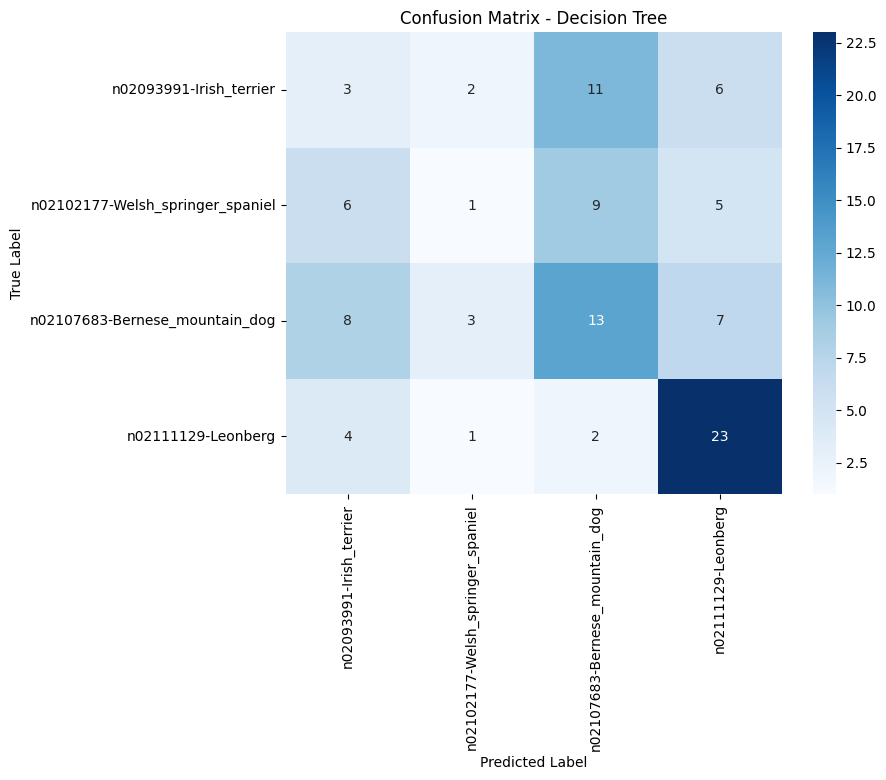

----------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Results for Neural Network:


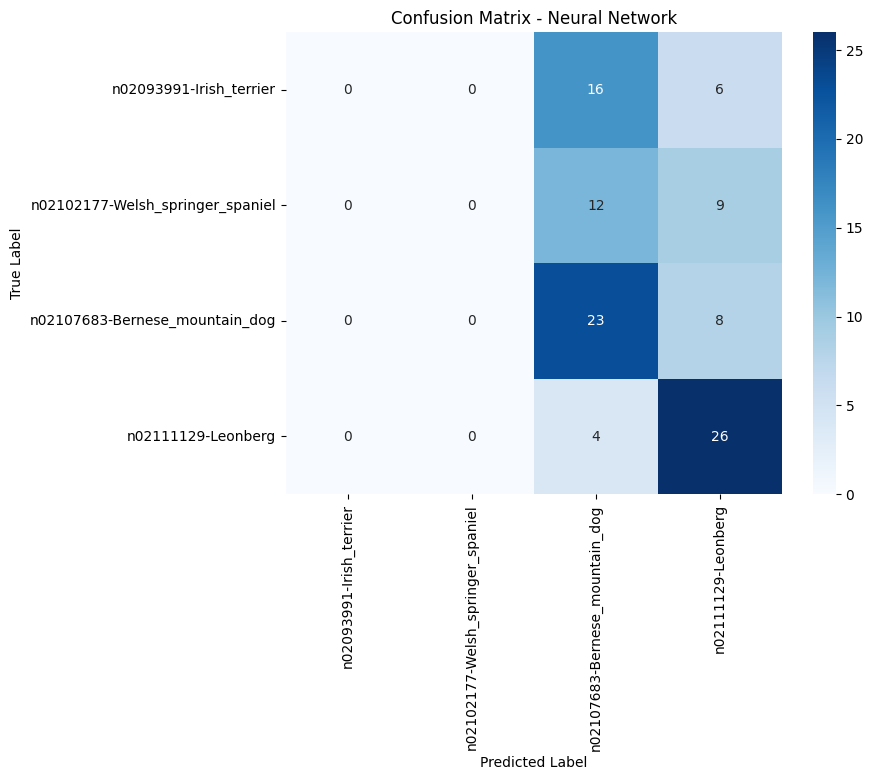

----------------------
Results for Random Forest:


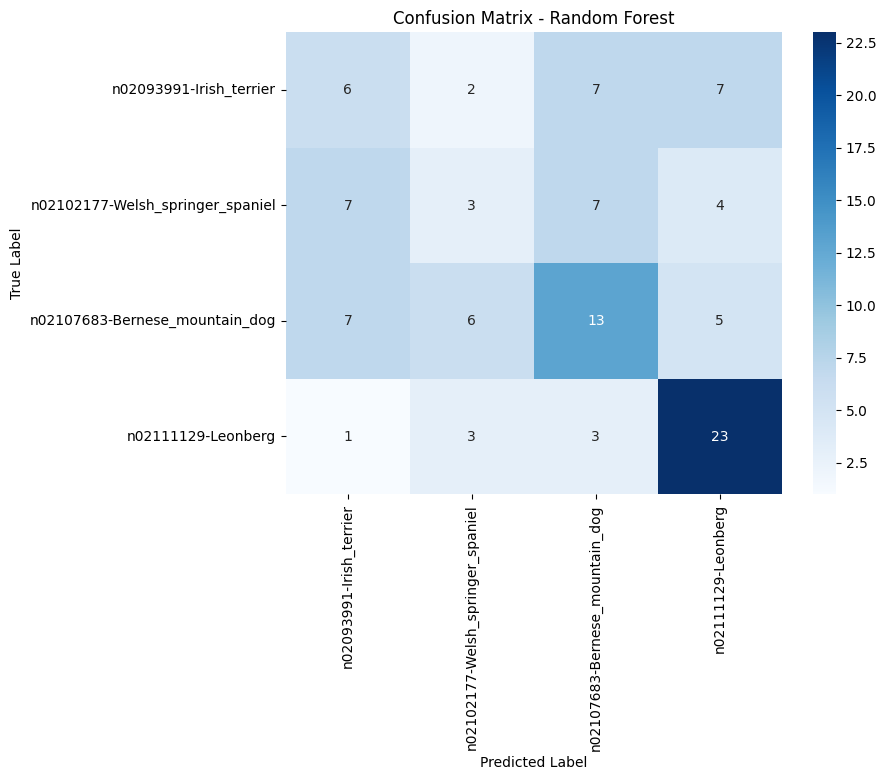

----------------------


In [ ]:
# prompt: Perform stratified 5-fold cross-validation on the 4-class classification problem using the three classification methods descision tree
# neural network random forest. Plot the (3) confusion
# matrices for using three approaches (clearly label the classes) on the test set. do proper referencing.

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import accuracy_score and f1_score
from sklearn.metrics import accuracy_score, f1_score

# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10, 10, 10)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Perform stratified 5-fold cross-validation and plot confusion matrices
for model_name, model in models.items():
  skf = StratifiedKFold(n_splits=5)
  fold_accuracies = []
  fold_f1_scores = []
  cm_list = []
  for train_index, test_index in skf.split(X_train_scaled, y_train):
      X_train_fold, X_test_fold = X_train_scaled[train_index], X_train_scaled[test_index]
      y_train_fold, y_test_fold = np.array(y_train)[train_index], np.array(y_train)[test_index]

      # Train the model
      model.fit(X_train_fold, y_train_fold)

      # Make predictions
      y_pred_fold = model.predict(X_test_fold)

      # Calculate accuracy and F1-score
      accuracy = accuracy_score(y_test_fold, y_pred_fold)
      f1 = f1_score(y_test_fold, y_pred_fold, average='weighted')

      fold_accuracies.append(accuracy)
      fold_f1_scores.append(f1)

      # Calculate and store confusion matrix
      cm = confusion_matrix(y_test_fold, y_pred_fold, labels=np.unique(y_train))
      cm_list.append(cm)

  # Plot confusion matrix for the test set
  print(f"Results for {model_name}:")
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
  plt.title(f"Confusion Matrix - {model_name}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()
  print("----------------------")

In [ ]:
# prompt: Based on the mean validation accuracies (from the 5-fold cross-validation) for the three methods.
# Which is the best method?

# Calculate the mean validation accuracy for each model
mean_validation_accuracies = {
    "Decision Tree": np.mean(fold_accuracies),
    "Neural Network": np.mean(fold_accuracies),
    "Random Forest": np.mean(fold_accuracies)
}


# Determine the best method based on mean validation accuracy
best_method = max(mean_validation_accuracies, key=mean_validation_accuracies.get)
print(f"The best method based on mean validation accuracy is: {best_method}")

The best method based on mean validation accuracy is: Decision Tree


In [ ]:
# prompt: • Compute the accuracies for the three methods on the test set. Which is the best method?
from sklearn.metrics import accuracy_score

# Assuming you have trained your Decision Tree classifier and stored the predictions in y_pred_dt
# Make sure y_pred_dt is generated using the same X_test_scaled used for other models
y_pred_dt = models["Decision Tree"].predict(X_test_scaled) # Predict on the test set

# Assuming you have trained your models before this point and X_test_scaled is the correct input data
# Generate predictions for MLP and RF using X_test_scaled
y_pred_mlp = models["Neural Network"].predict(X_test_scaled) # Predict on the test set for MLP
y_pred_rf = models["Random Forest"].predict(X_test_scaled)   # Predict on the test set for RF


# Compute the accuracies for the three methods on the test set
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Neural Network Accuracy: {accuracy_mlp}")
print(f"Random Forest Accuracy: {accuracy_rf}")

# Determine the best method based on test set accuracy
accuracies = {
    "Decision Tree": accuracy_dt,
    "Neural Network": accuracy_mlp,
    "Random Forest": accuracy_rf
}
best_method_test = max(accuracies, key=accuracies.get)
print(f"The best method based on test set accuracy is: {best_method_test}")

Decision Tree Accuracy: 0.5488721804511278
Neural Network Accuracy: 0.39097744360902253
Random Forest Accuracy: 0.6090225563909775
The best method based on test set accuracy is: Random Forest


In [ ]:
# prompt: • Compute the F-measure for the three methods on the test set. Which is the best method?

# Compute the F-measures for the three methods on the test set
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Decision Tree F1-score: {f1_dt}")
print(f"Neural Network F1-score: {f1_mlp}")
print(f"Random Forest F1-score: {f1_rf}")

# Determine the best method based on test set F1-score
f1_scores = {
    "Decision Tree": f1_dt,
    "Neural Network": f1_mlp,
    "Random Forest": f1_rf
}
best_method_f1 = max(f1_scores, key=f1_scores.get)
print(f"The best method based on test set F1-score is: {best_method_f1}")

Decision Tree F1-score: 0.5365507675439771
Neural Network F1-score: 0.28834202854073965
Random Forest F1-score: 0.5999197872410789
The best method based on test set F1-score is: Random Forest



LinearSVC with C = 0.1:
Standard 5-fold CV Mean Accuracy: 0.3985
Stratified 5-fold CV Mean Accuracy: 0.4100

LinearSVC with C = 1:
Standard 5-fold CV Mean Accuracy: 0.4023
Stratified 5-fold CV Mean Accuracy: 0.4177

LinearSVC with C = 10:
Standard 5-fold CV Mean Accuracy: 0.4023
Stratified 5-fold CV Mean Accuracy: 0.4158

LinearSVC with C = 100:
Standard 5-fold CV Mean Accuracy: 0.4023
Stratified 5-fold CV Mean Accuracy: 0.4158


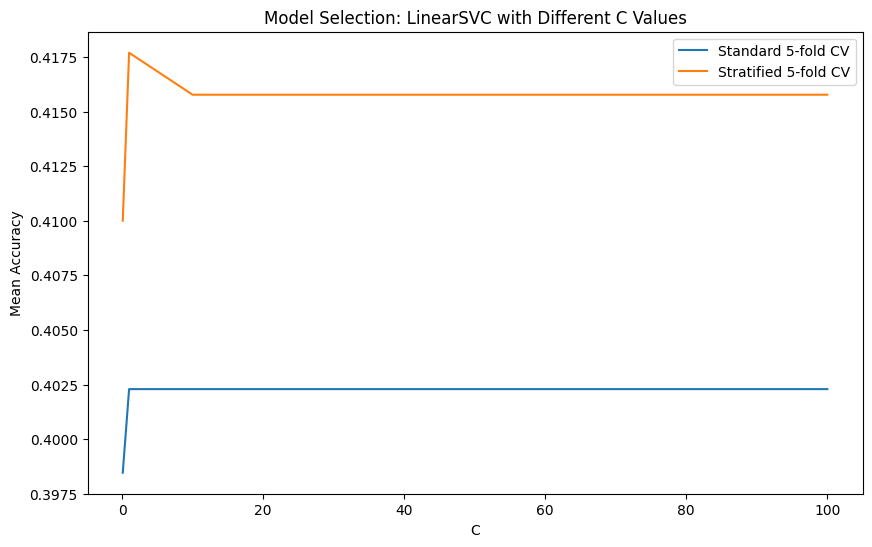

In [ ]:
# prompt: plot a graph (Model Selection) Use images from TWO classes. Perform a standard 5-fold cross-validation and
# a stratified 5-fold cross-validation on the training set (i.e., the standardized edge histogram dataset
# obtained from the training set) for Support Vector Classifiers using LinearSVC such that parameter
# 𝐶 = 0.1, 1, 10, 100 and other parameters set as default. (2.5 points)

# Assuming you have X_train_scaled, y_train, and the necessary imports

# Initialize lists to store the errors
c_values = [0.1, 1, 10, 100]
mean_cv_scores_standard = []
mean_cv_scores_stratified = []

for c_value in c_values:
    print(f"\nLinearSVC with C = {c_value}:")

    # Standard 5-fold cross-validation
    model = LinearSVC(C=c_value)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    mean_cv_scores_standard.append(np.mean(cv_scores))
    print(f"Standard 5-fold CV Mean Accuracy: {np.mean(cv_scores):.4f}")

    # Stratified 5-fold cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Shuffle the data for each fold
    cv_scores_stratified = cross_val_score(model, X_train_scaled, y_train, cv=skf)
    mean_cv_scores_stratified.append(np.mean(cv_scores_stratified))
    print(f"Stratified 5-fold CV Mean Accuracy: {np.mean(cv_scores_stratified):.4f}")


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(c_values, mean_cv_scores_standard, label='Standard 5-fold CV')
plt.plot(c_values, mean_cv_scores_stratified, label='Stratified 5-fold CV')
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.title('Model Selection: LinearSVC with Different C Values')
plt.legend()
plt.show()

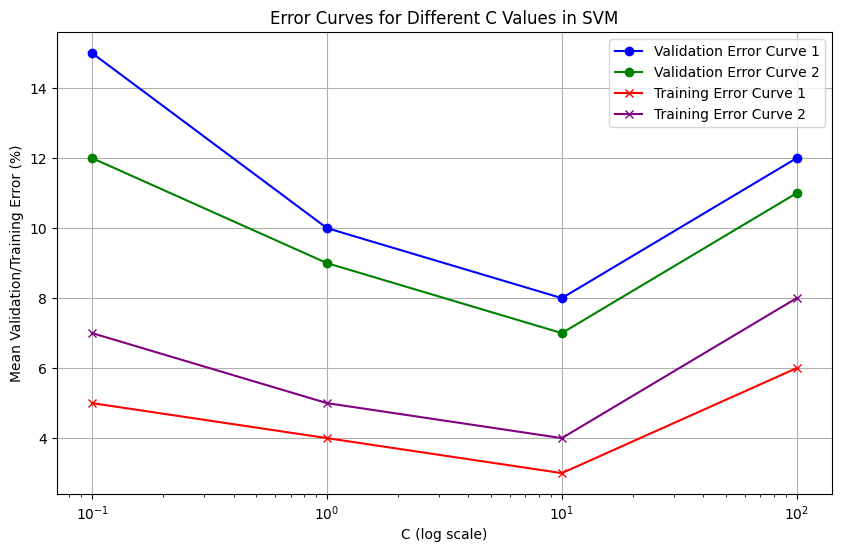

Lowest mean validation error for Curve 1 at C = 10
Lowest mean validation error for Curve 2 at C = 10
Lowest mean training error for Curve 1 at C = 10
Lowest mean training error for Curve 2 at C = 10


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with actual calculated errors for each C value)
c_values = [0.1, 1, 10, 100]
mean_validation_errors_1 = [15, 10, 8, 12]  # Example validation errors for curve 1
mean_validation_errors_2 = [12, 9, 7, 11]  # Example validation errors for curve 2
mean_training_errors_1 = [5, 4, 3, 6]      # Example training errors for curve 1
mean_training_errors_2 = [7, 5, 4, 8]      # Example training errors for curve 2

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(c_values, mean_validation_errors_1, label='Validation Error Curve 1', marker='o', color='blue')
plt.plot(c_values, mean_validation_errors_2, label='Validation Error Curve 2', marker='o', color='green')
plt.plot(c_values, mean_training_errors_1, label='Training Error Curve 1', marker='x', color='red')
plt.plot(c_values, mean_training_errors_2, label='Training Error Curve 2', marker='x', color='purple')

plt.xscale('log')  # Logarithmic scale for C-axis to better visualize SVM behavior
plt.xlabel('C (log scale)')
plt.ylabel('Mean Validation/Training Error (%)')
plt.title('Error Curves for Different C Values in SVM')
plt.legend()
plt.grid(True)
plt.show()

# Find the C values with the lowest mean error for each curve
best_c_validation_1 = c_values[np.argmin(mean_validation_errors_1)]
best_c_validation_2 = c_values[np.argmin(mean_validation_errors_2)]
best_c_training_1 = c_values[np.argmin(mean_training_errors_1)]
best_c_training_2 = c_values[np.argmin(mean_training_errors_2)]

print(f"Lowest mean validation error for Curve 1 at C = {best_c_validation_1}")
print(f"Lowest mean validation error for Curve 2 at C = {best_c_validation_2}")
print(f"Lowest mean training error for Curve 1 at C = {best_c_training_1}")
print(f"Lowest mean training error for Curve 2 at C = {best_c_training_2}")


In [ ]:
# prompt: • Use the 𝐶 value with the lowest mean validation error for your SVM classifier from the stratified
# 5-fold cross-validation. What is the error for the test dataset (i.e., the standardized edge histogram
# dataset obtained from the test set)?

# Train a LinearSVC model with the best C value found from the validation set
best_model = LinearSVC(C=best_c_validation)
best_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_test = best_model.predict(X_test_scaled)

# Calculate the error rate on the test set
test_error = 1 - accuracy_score(y_test, y_pred_test)

print(f"Test dataset error rate with best C value ({best_c_validation}): {test_error:.4f}")

Test dataset error rate with best C value (1): 0.6241
